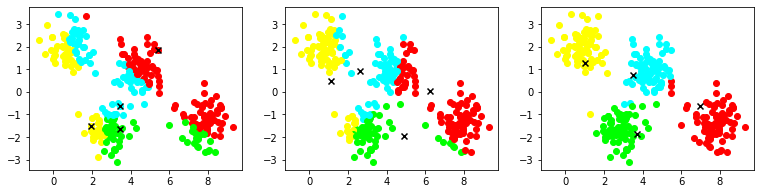

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Raw data file
file_to_load = "cdata.csv"
# Read purchasing file and store into pandas data frame
cdata = pd.read_csv(file_to_load)
df=cdata.drop(labels=["cluster"], axis="columns")
plt.figure(figsize=(13,3))
#顏色(10)
c=['red','yellow','lime','cyan','deeppink','coral','gold','greenyellow','deepskyblue','fuchsia']

#每個點與中心點的距離
def distance(a):
    dis=((df['x']-list1[a])**2+(df['y']-list2[a])**2)**0.5
    return dis

#隨機抽取中心點
list1,list2,list3=[],[],[]
random=df.sample(n=4,axis=0)
for i in range(len(random['x'])):
    kx=random['x'].iloc[i]
    ky=random['y'].iloc[i]
    list1.append(kx)
    list2.append(ky)
    #每個點和中心點的距離(中心點x-x)
    df.insert(i+2,column=i+1,value=distance(i))
    list3.append(i+1)
#每個點距離最短的中心點
distance_min=df[list3].min(axis=1)
df.insert(i+3,column='min',value=distance_min)
df.insert(i+4,column='cluster',value='')

#分群
def clustering(k):
    for i in range(len(df['min'])):
        for j in range(k):
            if df.loc[i,'min']==df.loc[i,j+1]:
                df.loc[i,'cluster']=j+1
                plt.scatter(df.loc[i,'x'],df.loc[i,'y'],color=c[j])
    return plt.show
plt.subplot(131)
clustering(4)
plt.scatter(list1,list2,marker='x',color='black')

#更新後的點和中心點距離
def new_distance(a):
    d=((df['x']-mean.loc[a,'x'])**2+(df['y']-mean.loc[a,'y'])**2)**0.5
    return d
#改變中心點位置 round2
group=df.groupby('cluster')
mean=group.agg({'x':'mean','y':'mean'})
for i in range(4):
    df[i+1]=new_distance(i+1)
new_distance_min=df[list3].min(axis=1)
df['min']=new_distance_min
plt.subplot(132)
clustering(4)
plt.scatter(mean['x'],mean['y'],marker='x',color='black')

#改變中心點位置 round3
group=df.groupby('cluster')
mean=group.agg({'x':'mean','y':'mean'})
for i in range(4):
    df[i+1]=new_distance(i+1)
new_distance_min=df[list3].min(axis=1)
df['min']=new_distance_min
plt.subplot(133)
clustering(4)
plt.scatter(mean['x'],mean['y'],marker='x',color='black')

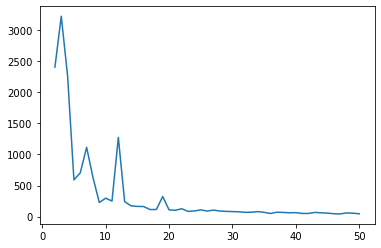

In [2]:
# Raw data file
file_to_load = "cdata.csv"
# Read purchasing file and store into pandas data frame
cdata = pd.read_csv(file_to_load)
def df1(k):
    df=cdata.drop(labels=["cluster"], axis="columns")
    #每個點與中心點的距離
    def distance(a):
        dis=(df['x']-list1[a])**2+(df['y']-list2[a])**2
        return dis
    #隨機抽取中心點
    list1,list2,list3=[],[],[]
    random=df.sample(n=k,axis=0)
    for i in range(len(random['x'])):
        kx=random['x'].iloc[i]
        ky=random['y'].iloc[i]
        list1.append(kx)
        list2.append(ky)
        #每個點和中心點的距離(中心點x-x)
        df.insert(i+2,column=i+1,value=distance(i))
        list3.append(i+1)
    #每個點距離最短的中心點
    distance_min=df[list3].min(axis=1)
    df.insert(i+3,column='min',value=distance_min)
    return df['min'].sum(axis=0)
list4,list5=[],[]
for i in range(49):
    list4.append(df1(i+2))
    list5.append(i+2)
plt.plot(list5,list4)

<BarContainer object of 10 artists>

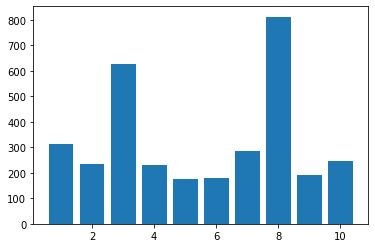

In [3]:
list6,list7=[],[]
for i in range(10):
    list6.append(df1(10))
    list7.append(i+1)
plt.bar(list7,list6)